<div style="border:solid green 2px; padding: 20px">
<b>Эдуард, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Критическая ошибка:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Хорошо, но можно и лучше:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Все отлично:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Исследование продаж компьютерных игр

Руководство интернет-магазина "Стримчик" поставила задачу выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. В качестве источника информации были взяты данные до 2016 года из открытого источника. 

**Цель исследования** - провести анализ закономерностей успешности компьютерных игр.

**Ход исследования**

Данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) взяты из файла games.csv. О качестве данных ничего не известно. Поэтому перед проведением основого анализа необходимо провести предобработку данных.

Таким образом, исследование можно разделить на следующие этапы:

1. Изучение данных из файла.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Составление портрета пользователя каждого региона.
5. Проверка гипотез.

# Содержание
* [Изучение данных из файла](#Изучение-данных-из-файла)
* [Прeдобработка данных](#Предобработка-данных)
* [Исследовательский анализ данных](#Исследовательский-анализ-данных)
* [Составление портрета пользователя каждого региона](#Составление-портрета-пользователя-каждого-региона)
    * [Самые популярные платформы (топ-5)](#Самые-популярные-платформы-(топ-5))
    * [Самые популярные жанры (топ-5)](#Самые-популярные-жанры-(топ-5))
    * [Влияние рейтинга ESRB на продажи](#Влияние-рейтинга-ESRB-на-продажи)
* [Проверка гипотез](#Проверка-гипотез)
    * [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковые)
    * [Средние пользовательские рейтинги жанров Action и Sports разные](#Средние-пользовательские-рейтинги-жанров-Action-и-Sports-разные)
* [Общий вывод](#Общий-вывод)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. 

</div>

## Изучение данных из файла

In [179]:
# импортируем все необходимые для исследования библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns
import plotly.express as px

In [180]:
# загрузим файл с данными
df = pd.read_csv('/datasets/games.csv', sep=',') 

In [181]:
# выведем на экран первые 5 строк df
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [182]:
# получим общую информацию о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, в таблице 11 столбцов. В столбцах встречаются следующие типы данных: float - в шести столбцах и object - в пяти столбцах.

Согласно документации к данным:

- Name — название игры;
- Platform — платформа;
- Year_of_Release — год выпуска;
- Genre — жанр игры;
- NA_sales — продажи в Северной Америке (миллионы проданных копий);
- EU_sales — продажи в Европе (миллионы проданных копий);
- JP_sales — продажи в Японии (миллионы проданных копий);
- Other_sales — продажи в других странах (миллионы проданных копий);
- Critic_Score — оценка критиков (максимум 100);
- User_Score — оценка пользователей (максимум 10);
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Анализ общей информации показал, что в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating содержатся пропущенные значения. На следующем этапе предобработки данных займемся их редактированием, а также изменим регистр символов и типы данных.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Первичные данные посмотрели, давай теперь их обработаем, ведь у нас есть план 😊. 
</div>

## Предобработка данных

Мы видим, что названия столбцов и сами текстовые значения содержат символы верхнего регистра. Приведем все символы к нижнему регистру.

In [183]:
# заменим названия столбцов (приведем к нижнему регистру)
df.columns = df.columns.str.lower()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Отличный способ заменить регистр в наших данных 👍
</div>

In [184]:
# приведем все символы текстовых значений к нижнему регистру
columns=['name', 'platform', 'genre', 'rating']
for i in columns:
    df[i] = df[i].str.lower()

In [185]:
# посмотрим на количество пропусков в каждом столбце
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Мы видим, что пропуски имеются в 6 столбцах, при этом их количество в столбцах name, year_of_release и genre невелико, поэтому удалим эти строчки. Пропуски в столбцах critic_score, user_score и rating не будем трогать, чтобы не исказить результаты анализа. Также отметим, что столбце с оценкой пользователей встречается аббревиатура "tbd". Она расшифровывается как "to be determined" - еще не определен. Данное значение заменим на пропуски.

In [186]:
# удалим пропуски в столбцах name, year_of_release и genre
df = df.dropna(subset=['name', 'year_of_release', 'genre'])

In [187]:
# заменим в столбце user_score значение 'tbd' на пропуски
df.loc[df['user_score']=='tbd', 'user_score'] = np.nan

In [188]:
# изменим типы данных в столбцах year_of_release и critic_score
df['year_of_release'] = df['year_of_release'].astype('int16')
df['user_score'] = df['user_score'].astype('float32')

В исходной таблице продажи во всех регионах представлены в виде float. Согласно документации, они измеряются миллионами проданных копий. Это значит, что значения должны представлять собой целые числа. 

In [189]:
# округлим значения в столбцах продаж до целых чисел и заменим тип данных на int
columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for i in columns:
    df[i] = np.ceil(df[i]).astype('int32')
# выведем измененную таблицу на экран
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,42,29,4,9,76.0,8.0,e
1,super mario bros.,nes,1985,platform,30,4,7,1,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,16,13,4,4,82.0,8.3,e
3,wii sports resort,wii,2009,sports,16,11,4,3,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,12,9,11,1,NaN,NaN,NaN


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Крутой способ заменить типы данных в нескольких столбцах 👍
    
</div>

In [190]:
# проверим таблицу на наличие дубликатов
df.duplicated().sum()

0

In [191]:
# посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df['total_sales'] = df[columns].sum(axis=1)

В процессе предобработки данных была произведена замена символов верхнего регистра на символы нижнего регистра, обработаны пропуски, изменены типы данных и добавлен новый столбец total_sales для дальнейшего анализа.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати мы можем применить метод `sum(axis=1)` к суммируемым столбцам.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Применил метод sum().</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Здорово, что сразу пробуешь применить новые значения 👍, они так быстрее усвоятся.
</div>

## Исследовательский анализ данных

На данном этапе проведем следующие действия:
- проведем анализ выпуска игр в разные годы;
- посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам;
- выясним, какие платформы лидируют по продажам. Выберем несколько потенциально прибыльных платформ;
- построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам;
- посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами;
- cоотнесем выводы с продажами игр на других платформах;
- посмотрим на общее распределение игр по жанрам.

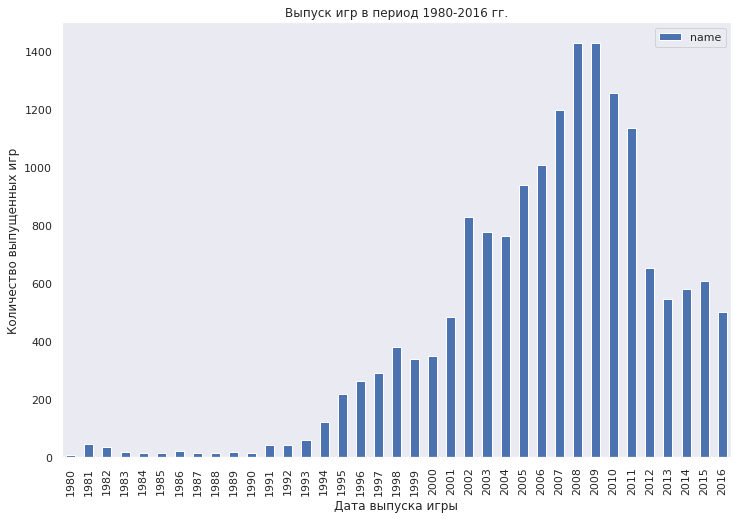

In [192]:
# построим график сводной таблицы, отражающей выпуск игр по годам
pivot_years = df.pivot_table(index=['year_of_release'], values=['name'], aggfunc='count')
pivot_years.plot(y='name', kind='bar', figsize=(12, 8), title='Выпуск игр в период 1980-2016 гг.')
plt.xlabel('Дата выпуска игры')
plt.ylabel('Количество выпущенных игр')
plt.grid()
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, когда график и его оси подписаны 😊👍
    
Так быстрее понять о чем идёт речь на самом графике.
    
</div>

На графике хорошо видно, что с 1980 по 1992 год игры выпускались в количестве до 46 шт. Затем происходит постепенный рост выпуска игр из года в год. Это связано с развитием новых технологий, появлением и большей доступностью игровых платформ. Самый пик выпуска игр приходится на 2008 и 2009 года (1427 и 1426 игр соответственно). Затем наблюдается спад в данном направлении - в 2016 г. было выпущено 502 игры.

Для корректного анализа наибольшую ценность представляют данные с 1993 г., так как до этого периода никакой динамики в выпуске новых игр не наблюдается.

In [193]:
# построим сводную таблицу с информацией о продажах игр для каждой платформы и выведем топ-10 на экран
top_platforms = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales',                                                                                                 
                                                                            ascending=False).head(10).reset_index()
top_platforms

,platform,total_sales
0,ps2,5961
1,ds,4422
2,ps3,3957
3,x360,3894
4,ps,3567
5,wii,3488
6,psp,2168
7,xb,2016
8,gba,1933
9,pc,1861


В тройке лидеров по объемам продаж находятся игры для следующих платформ:

- ps2 - 5961 млн. копий;
- ds - 4422 млн. копий;
- ps3 - 3957 млн. копий.

In [194]:
# создадим словарь для дальнейшего построения графиков
platforms_dict = top_platforms['platform'].unique()

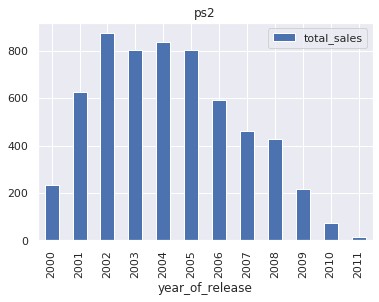

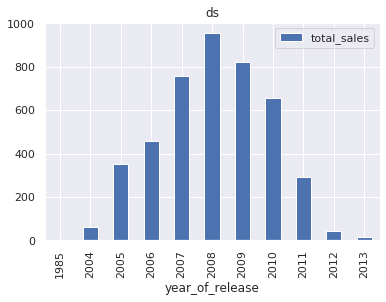

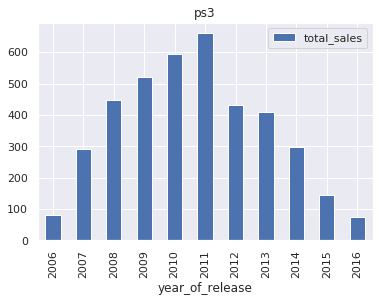

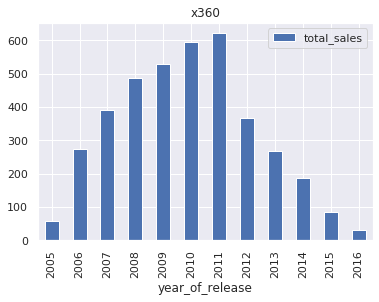

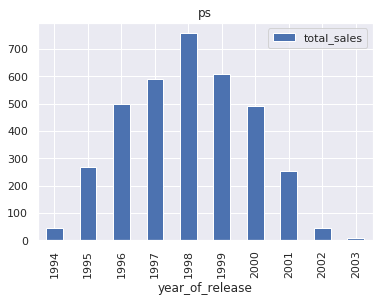

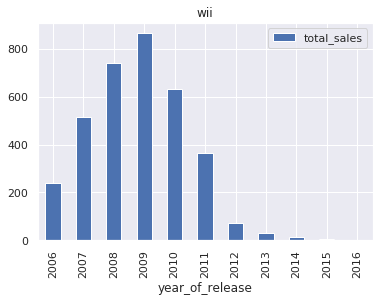

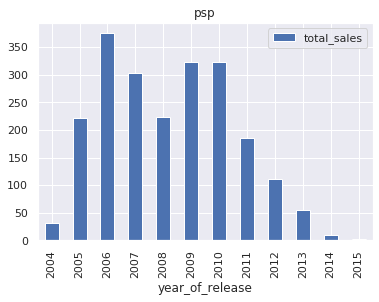

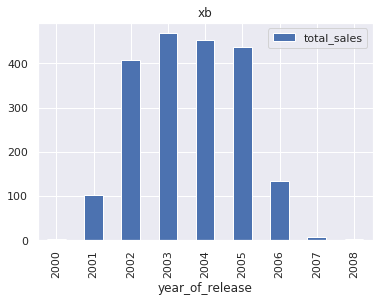

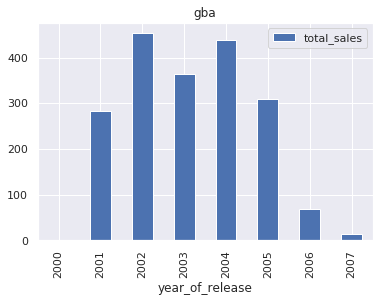

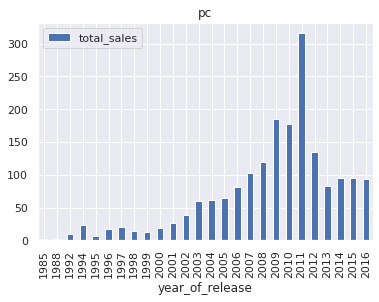

In [195]:
# построим графики распределения продаж по каждой платформе по годам
for platform in platforms_dict:
    df[df['platform']==platform].pivot_table(index='year_of_release', values='total_sales',
                                             aggfunc='sum').plot(kind='bar', title=platform, figsize=(6, 4), grid=True)

In [196]:
# посчитаем средний срок жизни платформы путем вычитания минимальной даты из максимальной, после чего найдем среднее значение
# по всем платформам
list_platforms = [] # создадим пустой списк
# найдем разницу между максимальной и минимальной даты для каждой платформы
for platform in df['platform'].unique():
    difference = (df[df['platform'] == platform]['year_of_release'].max()) - (df[df['platform'] == platform]['year_of_release'].min()) 
    list_platforms.append(difference) # добавим полученные значения в пустой список

In [197]:
# найдем среднее значение
mean = sum(list_platforms) / len(list_platforms)
mean

7.612903225806452

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Хорошо, что посмотрели на каждую платформу в отдельности. Таким образом мы сразу видим текущую ситуацию в каждой из них.
    
</div>

Мы видим, что для всех платформ характерна следующая картина: увеличение доходов к середине ее жизненного цикла, после чего они начинают уменьшаться. По графикам видно, что жизненный цикл игровой платформы в среднем составляет около 10 лет. В результате расчета было установлено точное значение - 7,6 лет.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Согласен.
    
В том числе мы могли посчитать срок жизни платформы – вычесть из максимальной даты минимальную по каждой платформе и затем усреднить получившиеся значения.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Так и сделал. Не знаю, можно ли было сделать это проще, чем получилось у меня.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Например сделать сводную таблицу по платформам и посчитать количество уникальных лет, а затем сделать среднее.
</div>

Далее для анализа выберем актуальный период - пусть он будет равен 10 лет.

In [198]:
# построим срез за период с 2006 по 2016 гг.
actual_df = df.query('year_of_release >= 2006')
actual_df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,42,29,4,9,76.0,8.0,e,84
2,mario kart wii,wii,2008,racing,16,13,4,4,82.0,8.3,e,37
3,wii sports resort,wii,2009,sports,16,11,4,3,80.0,8.0,e,34
6,new super mario bros.,ds,2006,platform,12,10,7,3,89.0,8.5,e,32
7,wii play,wii,2006,misc,14,10,3,3,58.0,6.6,e,30
8,new super mario bros. wii,wii,2009,platform,15,7,5,3,87.0,8.4,e,30
13,wii fit,wii,2007,sports,9,9,4,3,80.0,7.7,e,25
14,kinect adventures!,x360,2010,misc,15,5,1,2,61.0,6.3,e,23
15,wii fit plus,wii,2009,sports,10,9,3,2,80.0,7.4,e,24
16,grand theft auto v,ps3,2013,action,8,10,1,4,97.0,8.2,m,23


In [199]:
# сгруппируем таблицу по платформам с самыми высокими продажами
top_actual_platforms = actual_df.pivot_table(index='platform', values='total_sales', aggfunc='sum'
                                            ).sort_values(by='total_sales', ascending=False).head(10).reset_index()
# выведем на экран новую таблицу
top_actual_platforms

,platform,total_sales
0,ds,4003
1,ps3,3957
2,x360,3837
3,wii,3488
4,psp,1915
5,ps2,1780
6,pc,1482
7,ps4,1228
8,3ds,1203
9,psv,797


In [200]:
# создадим словарь для дальнейшего построения графиков
actual_platforms_dict = top_actual_platforms['platform'].unique()

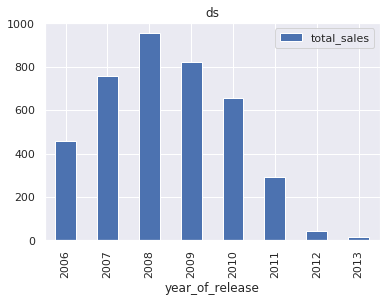

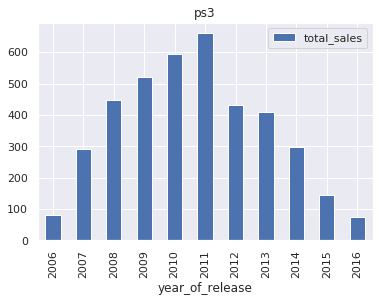

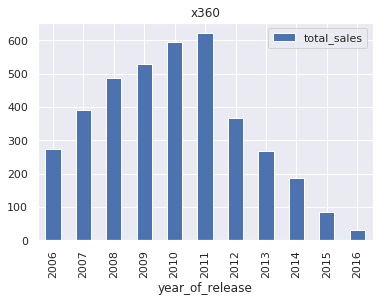

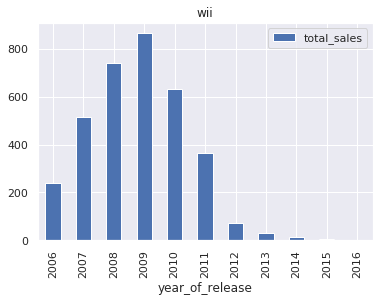

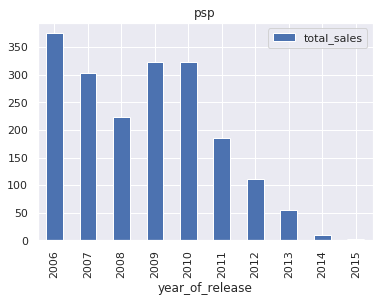

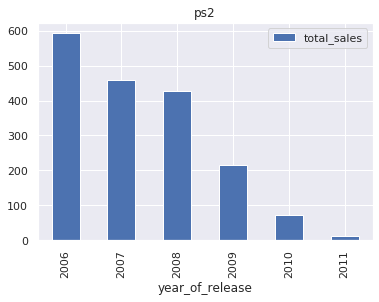

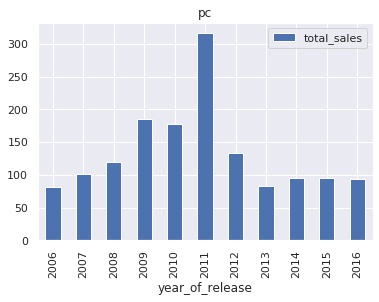

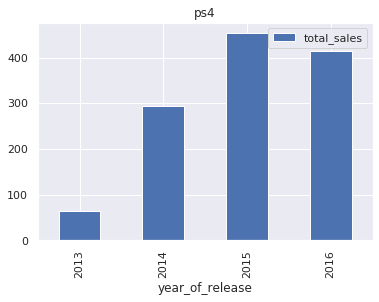

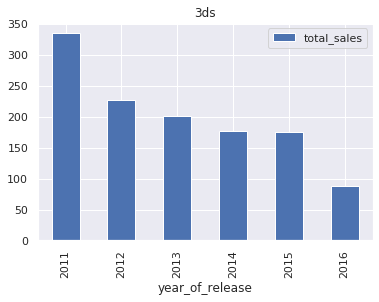

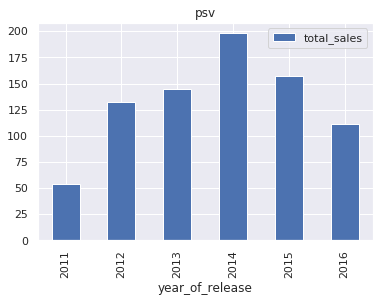

In [201]:
# построим графики распределения продаж по каждой платформе по годам
for actual_platform in actual_platforms_dict:
    actual_df[actual_df['platform']==actual_platform].pivot_table(index='year_of_release', values='total_sales',
                                             aggfunc='sum').plot(kind='bar', title=actual_platform, figsize=(6, 4), grid=True)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Хорошо, что еще раз проверяем состояние топа платформ 👍
    
Потому что после выбора актуального периода изменяется ситуация в данных.
</div>

Самые большие продажи игр за период с 2006 по 2016 гг. имеют следующие платформы:

- ds - 4003 млн. копий;
- ps3 - 3957 млн. копий;
- x360 - 3837 млн. копий.

На графиках хорошо видно, что жизненный цикл всех платформ, за исключением двух, находятся либо в фазе падения продаж (psv, 3ds, wii, x360, ps3), либо вообще уже не продаются (ps2, psp, ds). 

Растут продажи игр ps4, так как данная платформа появилась относительно недавно. Стабильными остаются продажи на pc.

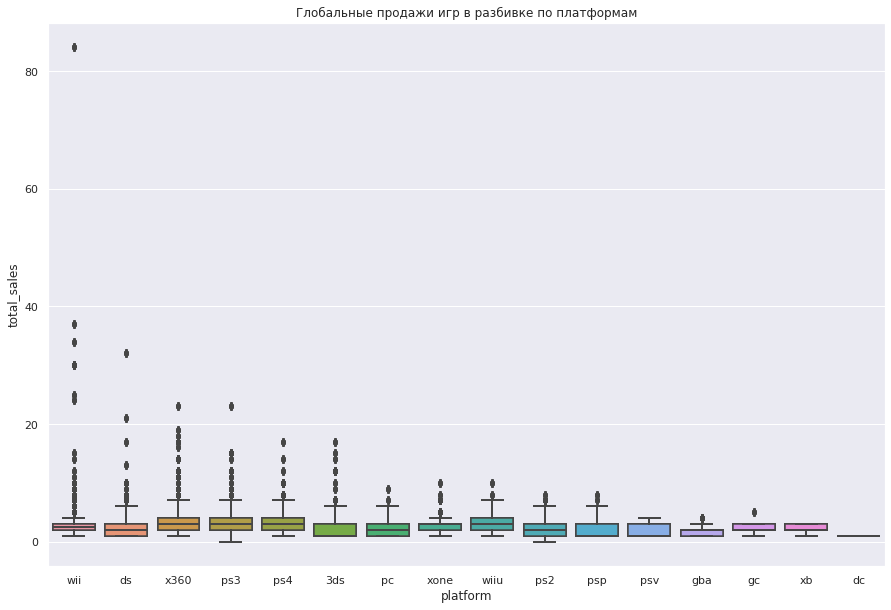

In [237]:
# построим график "ящик с усами" с выбросами по глобальным продажам игр в разбивке по платформам 
actual_df['platform'].unique()
for platform in actual_df['platform'].unique():
    sns.set(rc={"figure.figsize":(15, 10)})
    sns.boxplot(x='platform', y='total_sales', data=actual_df)
    plt.title('Глобальные продажи игр в разбивке по платформам')

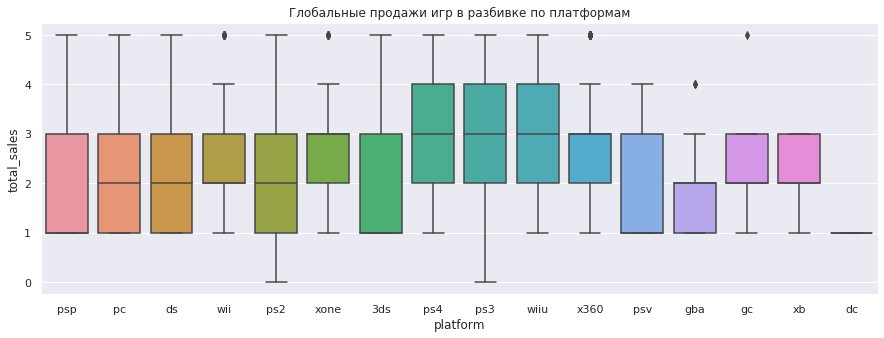

In [203]:
# построим график "ящик с усами" без выбросов по глобальным продажам игр в разбивке по платформам 
top_quantile = actual_df['total_sales'].quantile(0.75)
low_quantile = actual_df['total_sales'].quantile(0.25)
threshold = top_quantile + 2*low_quantile
fig, ax = plt.subplots(figsize =(15,5))
sns.boxplot(x = 'platform', 
            y = 'total_sales',
            data = actual_df.query('total_sales <= @threshold'))  
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.show()

Графики глобальных продаж игр в разбивке по платформам позволили выявить следующее:

- наибольшие медианные значения продаж у платформ x360, ps3 и ps4;
- практически все платформы имеют выбросы, но самые большие наблюдаются у wii;
- самые низкие продажи у dc.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

<s>Сам график лучше сделть побольше размером, чтобы его было удобнее изучать.
    
И показать можно в 2-х форматах: 
    
- с выбросами
- без выбросов
    
Кстати как думаешь стоит чистить здесь выбросы ? 
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Увеличил размер графика. Сделал 2 графика - с выбросами и без. 2-й вариант выглядит предпочтительнее, поэтому, думаю, можно ориентироваться на него.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Круто получилось 👍
</div>

Рассмотрим, как влияют на продажи внутри одной популярной платформы (ps4) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

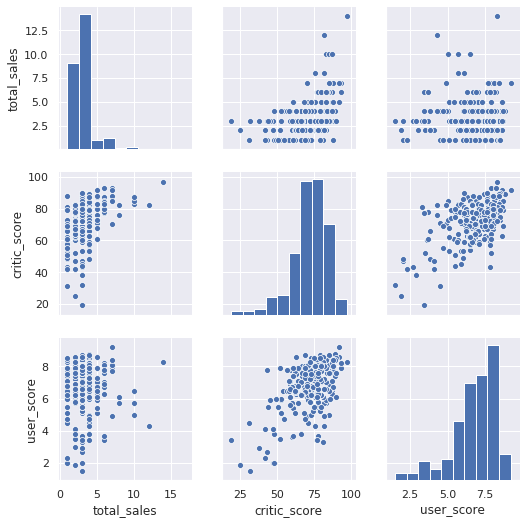

In [204]:
# построим диаграмму рассеяния для ps4
sns.pairplot(df[df['platform']=='ps4'][['total_sales', 'critic_score', 'user_score']])
plt.show()

Лучше продаются игры ps4, которые имеют высокую оценку критиков.
Взаимосвязь между объемом продаж и оценкой пользователей неоднозначная: игры, имеющие невысокую оценку, тоже хорошо продаются.

Построим функцию, которая вычисляет корреляцию между продажами и оценкой критикой, и между продажами и оценкой пользователей. Воспользуемся ей для сравнения корреляций между самыми популярными платформами.

In [205]:
# построим функцию для вычисления корреляции между продажами и оценкой критикой, и между продажами и оценкой пользователей, 
# а также построим для каждой платформы диаграмму рассеяния
def corr(df,platform):
    print('Корреляция между продажами и оценкой критиков', platform, ':',df.query('platform == @platform')['total_sales']
      .corr(df.query('platform == @platform')['critic_score']))
    print('Корреляция между продажами и оценкой пользователей', platform,':', df.query('platform == @platform')['total_sales']
      .corr(df.query('platform == @platform')['user_score']))
    sns.pairplot(df[df['platform']==platform][['total_sales', 'critic_score', 'user_score']])
plt.show()

Корреляция между продажами и оценкой критиков ps4 : 0.4343188440847789
Корреляция между продажами и оценкой пользователей ps4 : 0.024867837036885165


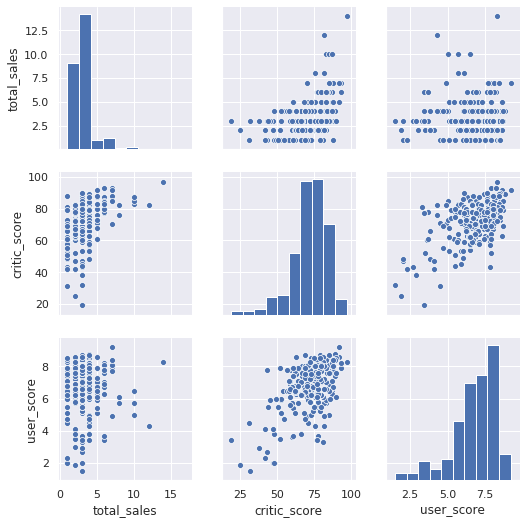

In [206]:
# корреляция для ps4
corr(actual_df, 'ps4')

Корреляция между продажами и оценкой критиков psv : 0.09184533188588855
Корреляция между продажами и оценкой пользователей psv : -0.05895148517155619


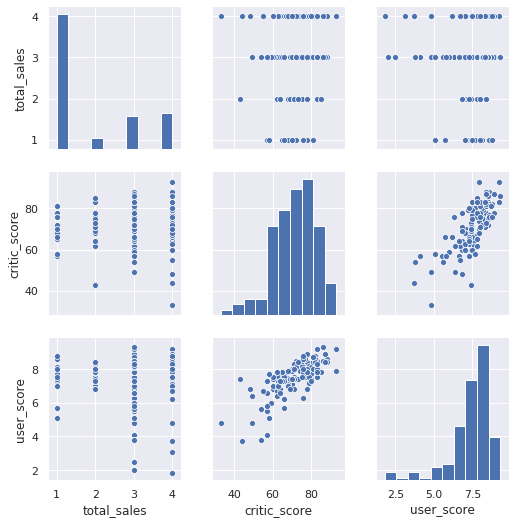

In [207]:
# корреляция для psv
corr(actual_df, 'psv')

Корреляция между продажами и оценкой критиков pc : 0.3397122223865302
Корреляция между продажами и оценкой пользователей pc : -0.012931738043168517


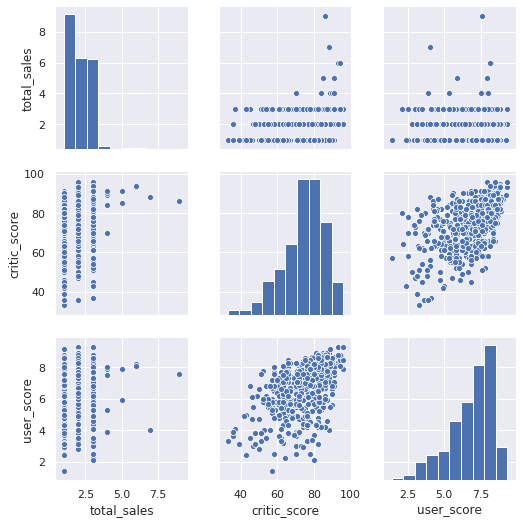

In [208]:
# корреляция для pc
corr(actual_df, 'pc')

Корреляция между продажами и оценкой критиков 3ds : 0.3652816385404499
Корреляция между продажами и оценкой пользователей 3ds : 0.18791092240428495


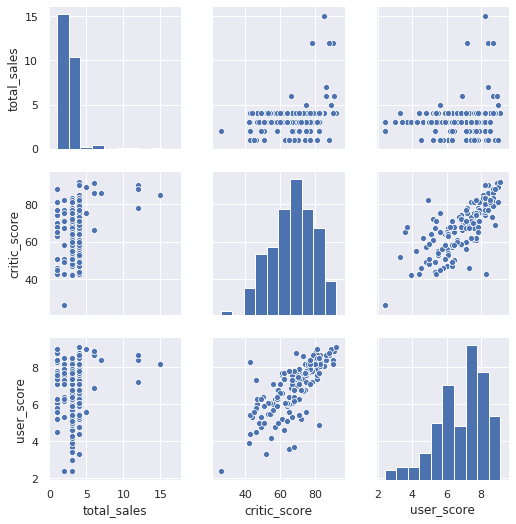

In [209]:
# корреляция для 3ds
corr(actual_df, '3ds')

Корреляция между продажами и оценкой критиков wii : 0.20817226176538753
Корреляция между продажами и оценкой пользователей wii : 0.15123473997753076


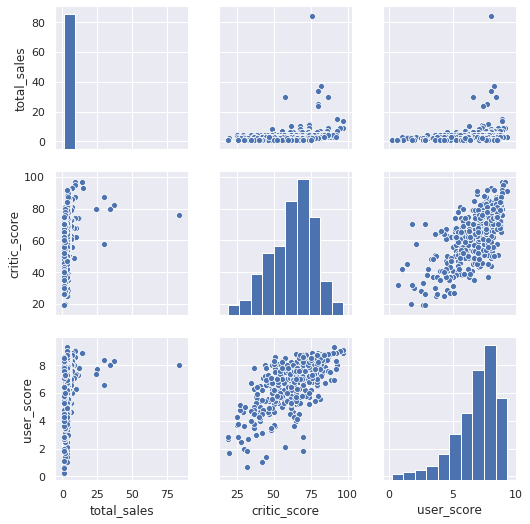

In [210]:
# корреляция для wii
corr(actual_df, 'wii')

Корреляция между продажами и оценкой критиков x360 : 0.3891666717144608
Корреляция между продажами и оценкой пользователей x360 : 0.14650063303249544


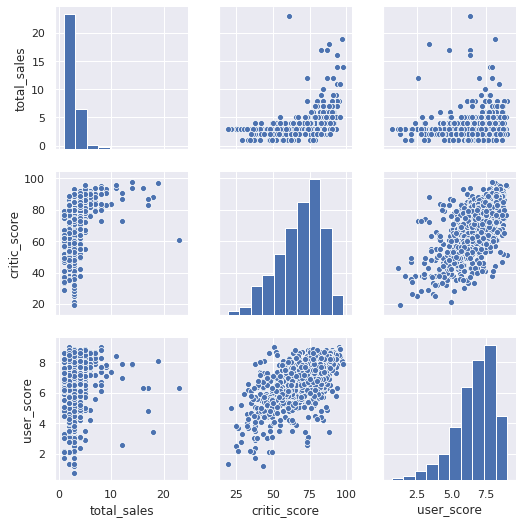

In [211]:
# корреляция для x360
corr(actual_df, 'x360')

Корреляция между продажами и оценкой критиков ps3 : 0.35867351944884013
Корреляция между продажами и оценкой пользователей ps3 : 0.12747167074185564


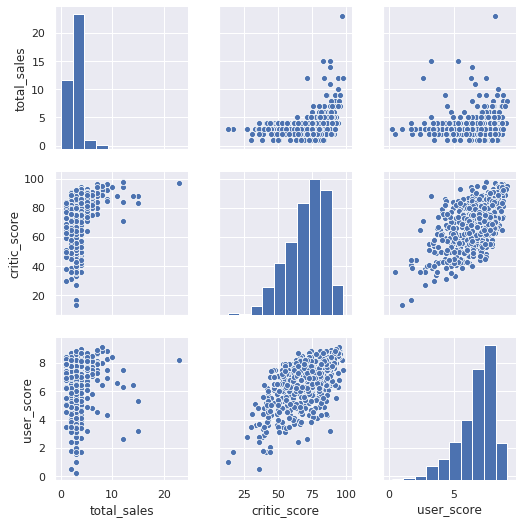

In [212]:
# корреляция для ps3
corr(actual_df, 'ps3')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    
Хорошие и логичные комментарии. Очень важно строить график корреляции между переменными, ведь может произойти такая ситуация, что расчет у нас очень сильный а на графике абсолютно другая картина.
    
---

В том числе можно было построить матрицу корреляции между нужными нам переменными.
    
И визуализировать её с помощью метода `heatmap` из библиотеки `seaborn`.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавил в функцию построение диаграммы рассеяния для каждой платформы.</div>

Наибольшая корреляция между объемом продаж и оценкой критиков наблюдается у следующих платформ: ps4, ps3, pc, x360 и 3ds.
Слабая корреляция между объемом продаж и оценкой критиков наблюдается у psv и wii. 
Оценка пользователей очень слабо коррелирует с объемом продаж для всех платформ.

In [213]:
# построим сводную таблицу, куда включим жанры игр и объем продаж
genre_df = actual_df.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=True).reset_index()
# выведем на экран genre_df
genre_df

,genre,total_sales
0,puzzle,726
1,strategy,743
2,platform,1049
3,fighting,1080
4,simulation,1342
5,racing,1516
6,adventure,1654
7,shooter,2412
8,role-playing,2517
9,misc,2766


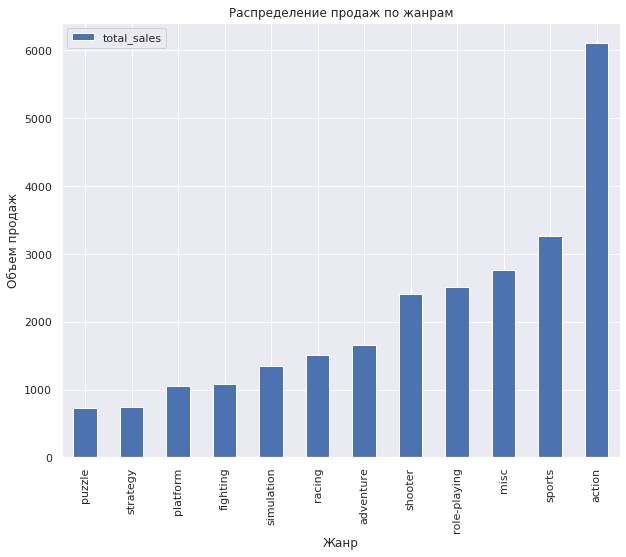

In [214]:
# построим столбчатый график
genre_df.plot(kind='bar', x='genre', y='total_sales', figsize=(10, 8), title='Распределение продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж')
plt.show()

Очевидным лидером среди жанров игр по продажам с 2006 по 2016 гг. является action (6104 млн. копий). Далее идут игры следующих жанров: sports (3268 млн. копий), misc (2766 млн. копий), role-playing (2517 млн. копий), shooter (2412 млн. копий).

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

А если мы посмотрим на средние значения продаж, какие выводы мы сможем сделать ? 
    
Почему на средние значения ? 
    
Т.к. эта метрика более устойчива к выбросам, чем просто суммы и количественные показатели.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Позволь уточнить, пожалуйста: в таблице genre_df ты рекомендуешь вместо sum использовать mean? Тогда график сильно изменится - я проверил. Мне казалось, что раз в исходных данных речь идет не о доходах в руб., а о количестве в шт., то суммы лучше подойдут.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Тут на самом деле не важно какая используется валюта, важна та суть, что при планировании магазин пытается построить максимально реалистичный план, который можно выполнить, а для этого как раз отлично подойдут средние показатели. Потому что чем больше значений в данных, тем труднее изменить средние значения. 
    
</div>

## Составление портрета пользователя каждого региона

### Самые популярные платформы (топ-5)

In [215]:
# составим функцию для выявления самых популярных платформ в трех регионах
def regions(index_n, values_n):
    platforms_of_region = actual_df.pivot_table(index=index_n, values= values_n, aggfunc='sum').sort_values(by=values_n,
                                        ascending=False).reset_index().head()
    print(platforms_of_region)
    plt.figure(figsize=(12, 8))
    plt.pie(x=platforms_of_region[values_n], labels = platforms_of_region[index_n], autopct='%.0f%%')
    plt.legend()
    plt.title(values_n)
    plt.show()

  platform  na_sales
0       ds      1466
1     x360      1385
2      wii      1345
3      ps3      1128
4      psp       491


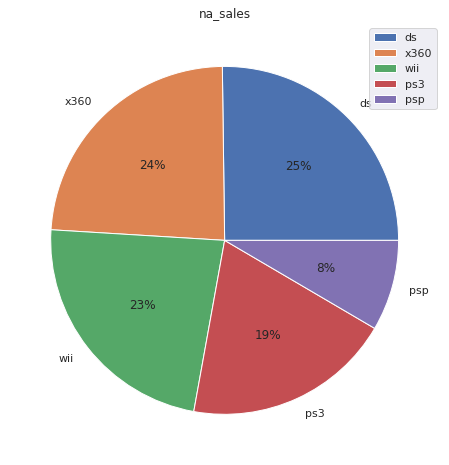

In [216]:
# самые популярные платформы в Северной Америке
regions('platform', 'na_sales')

  platform  eu_sales
0      ps3      1067
1     x360      1040
2      wii       852
3       ds       755
4       pc       749


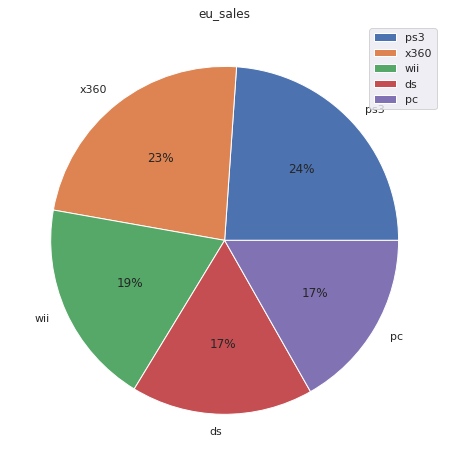

In [217]:
# самые популярные платформы в Европе
regions('platform', 'eu_sales')

  platform  jp_sales
0       ds       742
1      psp       735
2      ps3       707
3      ps2       417
4      3ds       401


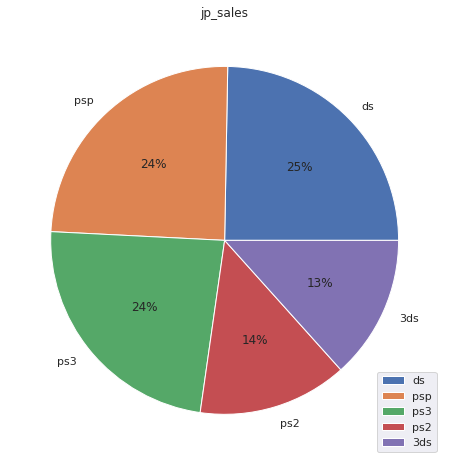

In [218]:
# самые популярные платформы в Японии
regions('platform', 'jp_sales')

Самой популярной платформой в период с 2006 по 2016 гг. в Северной Америке и Японии была ds, а в Европе ps3. При этом ps3 и ds входят в пятерку самых популярных платформ в трех регионах. 

### Самые популярные жанры (топ-5)

Воспользуемся функцией regions для определения самых популярных жанров в каждом регионе.

          genre  na_sales
0        action      1875
1        sports      1133
2          misc       943
3       shooter       854
4  role-playing       636


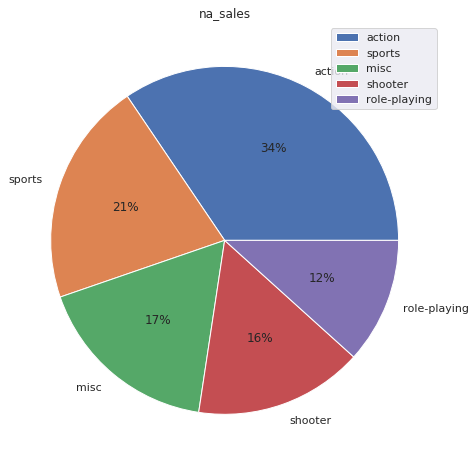

In [219]:
# самые популярные жанры в Северной Америке
regions('genre', 'na_sales')

          genre  eu_sales
0        action      1669
1        sports       863
2       shooter       685
3          misc       640
4  role-playing       518


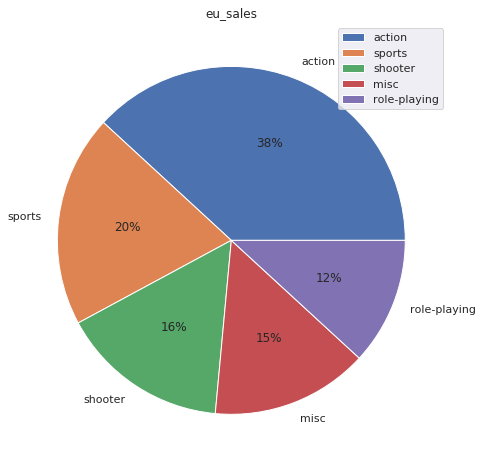

In [220]:
# самые популярный жанры в Европе
regions('genre', 'eu_sales')

          genre  jp_sales
0        action       994
1  role-playing       824
2     adventure       638
3          misc       418
4        sports       332


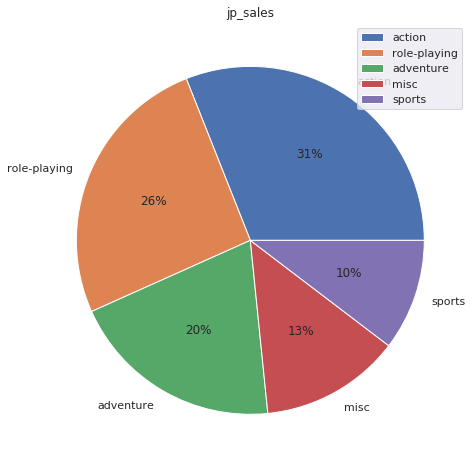

In [221]:
# самые популярные жанры в Японии
regions('genre', 'jp_sales')

Самым популярным жанром во всех регионах является action. Европа и Северная Америка имеют практически одинаковые предпочтения игровых жанров: единственное отличие в том, что в Северной Америке жанр misc популярнее жанра shooter на 1%, при этом в Европе обратная ситуация. В Японии несколько другая картина: если в Северной Америке и Европе жанр sports находится на втором месте по популярности, то в Японии этот жанр в топ-5 находится на последнем месте.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что наши действия повторяются с точки зрения построения графиков.
    
Это говорит о том, что мы можем создать функцию, которая будет выполнять все действия за нас.
    
Тем самым мы сможем оптимизировать свой код и проект целиком.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Использовал функцию.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Класс 👍
</div>

### Влияние рейтинга ESRB на продажи

Расшифруем каждую аббревиатуру рейтинга ESRB:

    E - everyone
    EC early childhood
    E10+ - older than 10 years old
    K-A - kids to adults
    T - teen
    M - mature +17
    AO - adults only
    RP - rating pending



Применим функцию regions для определения влияния рейтинга ESRB на продажи в каждом регионе

  rating  na_sales
0      e      2557
1      t      1648
2      m      1296
3   e10+      1267
4     ec         6


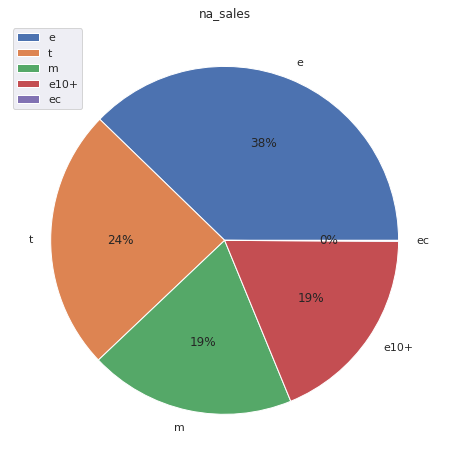

In [222]:
# влияние рейтинга ESRB на продажи в Северной Америке
regions('rating', 'na_sales')

  rating  eu_sales
0      e      1682
1      t      1403
2      m      1184
3   e10+       960
4     rp         1


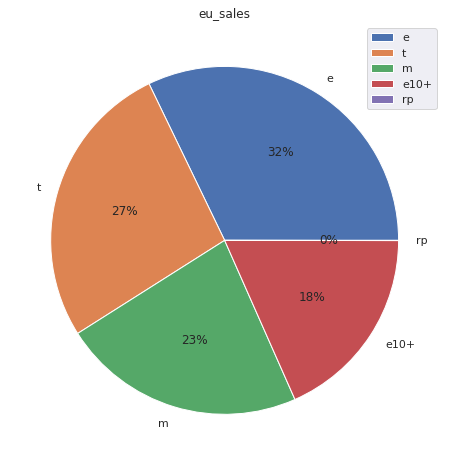

In [223]:
# влияние рейтинга ESRB на продажи в Европе
regions('rating', 'eu_sales')

  rating  jp_sales
0      t       659
1      m       477
2      e       423
3   e10+       233
4     ec         0


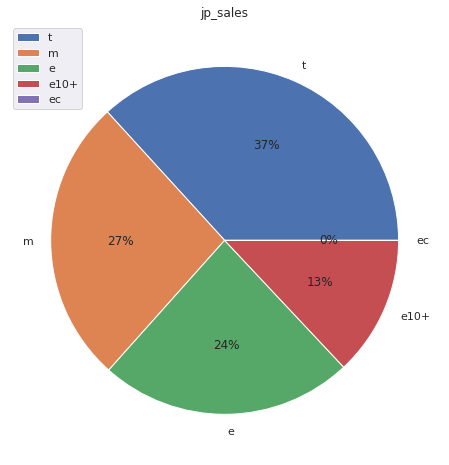

In [224]:
# влияние рейтинга ESRB на продажи в Японии
regions('rating', 'jp_sales')

Больше всего игр, имеющих самый большой объем продаж, в Северной Америке и Европе имеют рейтинг E (для всех), в Японии - T (для детей). Ситуация с продажами игр определенного рейтинга в Северной Америке идентична ситуации в Европе: самыми популярными рейтингами, помимо E, являтся T, M (старше 17 лет) и E10+ (старше 10 лет). В Японии первая четверка расположена в другом порядке, но состоит из тех же жанров.

**Вывод**

Протрет пользователя в Северной Америке:

- платформа: ds, X360, Wii;
- жанры: Action, Sports, Misc;
- рейтинг ERSB: E, T, M.

Протрет пользователя в Европе:

- платформа: PS3, X360, Wii;
- жанры: Action, Sports, Shooter;
- рейтинг ERSB: E, T, M.

Протрет пользователя в Японии:

- платформа: ds, psp, PS3;
- жанры: Action, Role-Playing, Adventure;
- рейтинг ERSB: T, M, E,.

Мы видим, что портрет американского потребителя и европейского почти одинаковый. Японцы помимо самого популярного жанра Action в отличие от европейцев и американцев предпочитают ролевые игры. Это может быть связано с большим развитием технологий и погружением страны в киберспорт. Возрастной рейтинг Японского пользователя по ERSB аналогичен американскому и европейскому, но более сконцентрирован на молодом и среднем возрастном сегменте . 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Достаточно детально проанализировали наши данные и изучили портреты пользователей.
    

    
Давай теперь проверим наши гипотезы.
    
</div>

## Проверка гипотез

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind().

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0 - разница между средним пользовательским рейтингом платформ Xbox One и PC статистически не значима.

H1 - разница между средним пользовательским рейтингом платформ Xbox One и PC статистически значима.

За альфу возьмем значение 0.05 ,то есть при p value < 5% мы отвергаем нулевую гипотезу.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Гипотезы сформулированы верно.
    
Можно было в формулировке указать просто равны / не равны)
    
    
**Best practies:**
    
<s>Перед проверкой гипотезы рекомендую проверить дисперсии выборок, чтобы корректно определить атрибут `equal_val` в Т–тесте.
    
В том числе стоит визуализировать распределение каждой выборки, чтобы определить нормальное ли у них распределение или нет.
    
Так мы покажем логичность и последовательность наших действий.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Визуализировал распределение каждой выборки.</div>

In [225]:
# отфильтруем таблицу actual_df по платформам xone и pc
stat_xone = actual_df.query('platform == "xone" and user_score!="NaN"').reset_index(drop=True)
stat_pc = actual_df.query('platform == "pc" and user_score!="NaN"').reset_index(drop=True)

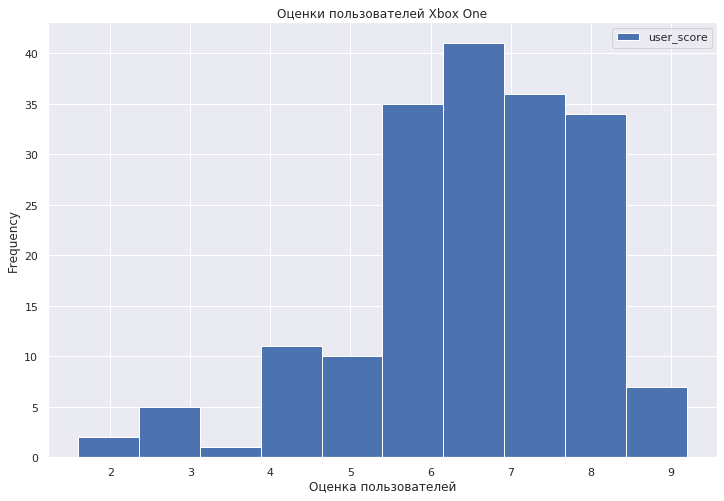

In [226]:
# визуализируем распределение пользовательских оценок для Xbox One
actual_df.query('platform == "xone" and user_score!="NaN"').reset_index(drop=True).plot(kind='hist', y='user_score',
figsize=(12, 8), title=('Оценки пользователей Xbox One'))
plt.xlabel('Оценка пользователей')
plt.show()

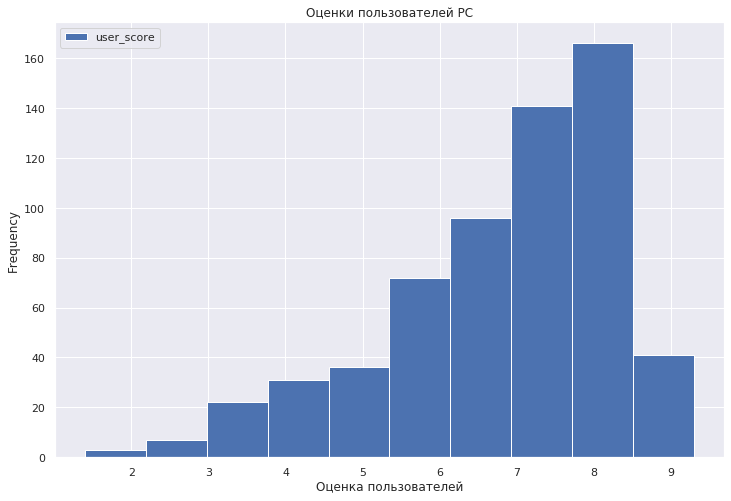

In [227]:
# визуализируем распределение пользовательских оценок для PC
actual_df.query('platform == "pc" and user_score!="NaN"').reset_index(drop=True).plot(kind='hist', y='user_score',
figsize=(12, 8), title=('Оценки пользователей PC'))
plt.xlabel('Оценка пользователей')
plt.show()

Распределения обеих выборок не являются нормальными - их значения смещены в одну сторону.

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

👍
</div>

In [228]:
# для определения значения параметра equal_var(True или False) найдем разницу между дисперсиями выборок
var_df1 = (np.var(stat_xone['user_score']) / np.var(stat_pc['user_score'])) * 100 - 100
var_df1

-17.95179843902588

Разница в дисперсиях больше 5%, поэтому параметр equal_var будет равен False.

In [229]:
# составим функцию для проверки двух гипотез
def stat(df_1, df_2):
    alpha=0.05
    results = st.ttest_ind(df_1['user_score'], df_2['user_score'], equal_var=False)
    print('p-значение:', results.pvalue)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

In [230]:
# проверка гипотезы №1
stat(stat_xone, stat_pc)

p-значение: 0.010140061909137556
Отвергаем нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные

H0 - разница между средним пользовательским рейтингом жанров Action и Sports статистически не значима.

H1 - разница между средним пользовательским рейтингом жанров Action и Sports статистически значима.

За альфу возьмем значение 0.05 ,то есть при p value < 5% мы отвергаем нулевую гипотезу.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Гипотезы сформулированы верно.
    
    
    
</div>

In [231]:
# отфильтруем таблицу actual_df по жанрам Action и Sports
stat_action = actual_df.query('genre == "action" and user_score!="NaN"').reset_index(drop=True)
stat_sports = actual_df.query('genre == "sports" and user_score!="NaN"').reset_index(drop=True)

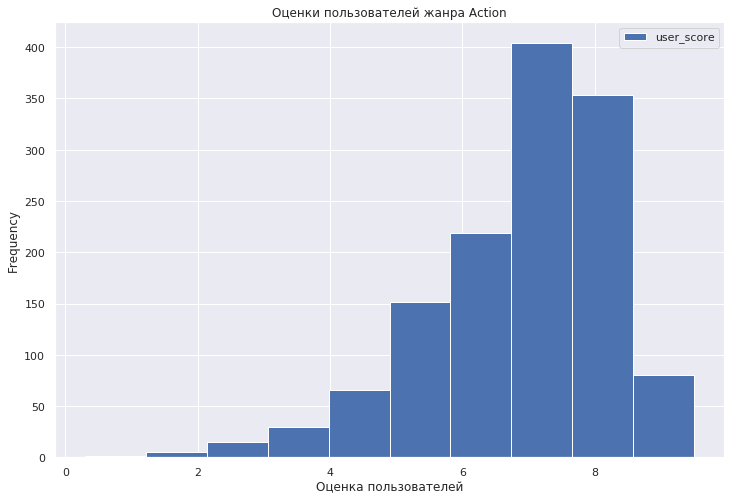

In [232]:
# визуализируем распределение пользовательских оценок для жанра Action
actual_df.query('genre == "action" and user_score!="NaN"').reset_index(drop=True).plot(kind='hist', y='user_score',
figsize=(12, 8), title=('Оценки пользователей жанра Action'))
plt.xlabel('Оценка пользователей')
plt.show()

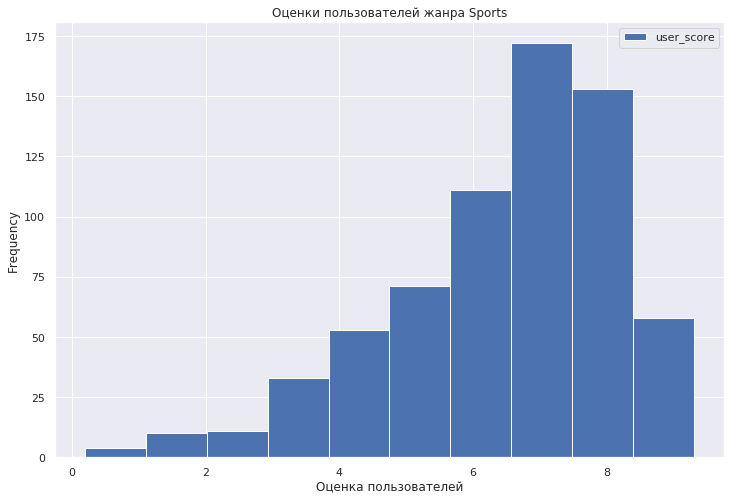

In [233]:
# визуализируем распределение пользовательских оценок для жанра Sports
actual_df.query('genre == "sports" and user_score!="NaN"').reset_index(drop=True).plot(kind='hist', y='user_score',
figsize=(12, 8), title=('Оценки пользователей жанра Sports'))
plt.xlabel('Оценка пользователей')
plt.show()

Распределения обеих выборок не являются нормальными - их значения смещены в одну сторону.

In [234]:
# для определения значения параметра equal_var(True или False) найдем разницу между дисперсиями выборок
var_df1 = (np.var(stat_action['user_score']) / np.var(stat_sports['user_score'])) * 100 - 100
var_df1

-31.891679763793945

Разница в дисперсиях больше 5%, поэтому параметр equal_var будет равен False.

In [235]:
# проверка гипотезы №2
stat(stat_action, stat_sports)

p-значение: 5.318778032412661e-10
Отвергаем нулевую гипотезу


Таким образом, мы отвергаем 1-ю нулевую гипотезу, т.е. разница между средним пользовательским рейтингом платформ Xbox One и PC статистически значима, и 2-ю гипотезу, т.е. разница между средним пользовательским рейтингом жанров Action и Sports статистически значима.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

<s>Обрати внимание, что наши действия также повторяются с точки зрения расчетов статистических тестов, это говорит о том, что мы можем также создать здесь функцию 😊
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Использовал функцию.</div>

## Общий вывод

В рамках данного проекта был проведен анализ продаж игр для различных платформ, разных жанров. В результате исследования было установлено:

1. В период 2008-2009 гг. было выпущено самое большое количество игр.
2. За весь период было продано больше всего игр для PS2 (5961 млн. копий), DS (4422 млн. копий) и PS3 (3957 млн. копий).
3. В среднем жизненный период игровой платформы составляет 10 лет.
4. На сегодняшний день игры для PS4 находятся в стадии роста и игры для PC продаются стабильно - остальные платформы либо уже неактуальны, либо они находятся на этапе спада.
5. Между объемами продаж и оценкой критикой имеется положительная корреляция.
6. В период с 2006 по 2016 гг. самыми популярными жанрами были Action (6104 млн. копий), Sports (3268 млн. копий) и Misc (2766 млн. копий).
7. В период с 2006 по 2016 гг. самыми непопулярными жанрами были Puzzle (726 млн. копий), Strategy (743 млн. копий) и Platform (1049 млн. копий).
8. Портрет пользователя из Северной Америке идентичен европейской пользовательской модели.
9. Игры с рейтингом E (для всех), T (для детей) и M (старше 17 лет) имеют самый высокий объем продаж.
10. Проверка нулевых гипотез показала, что в период с 2006 по 2016 гг. средние пользовательские рейтинги платформ Xbox One и PC различаются. То же самое можно сказать про то, что средние пользовательские рейтинги жанров Action и Sports разные.

Результаты проверки гипотез могли бы другими в зависимости от выбранного актуального периода.

Таким образом, интернет-магазину следует сделать основной акцент на продажах игр для PS4 и PC. В качестве жанров следует выбирать шутеры, спортивные игры и аркады, обращая внимание на оценки экспертов. Территориально стоит сосредоточить силы на Северной Америке и Европе. Обязательно следует следить за жизненным циклом игровых платформ, что всегда быть в тренде игровой индустрии.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
    
    
**[общий комментарий]** Ячейки **markdown** в том числе мы можем использовать как дополнительный способ стилизации нашего проекта. Оставил ниже ссылку, с примерами стилизации.

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet     
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    

Возвращаю проект обратно, чтобы убедиться что все мои комментарии понятны.
    
Если вдруг у тебя возникнут какие-то вопросы, то я с радостью отвечу на них 😊
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Здорово, что получилось поправить мои комментарии и сделать проект еще лучше. Тогда предлагаю двигаться дальше.

Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
    
</div>